In [ ]:
import requests
from io import StringIO
import pandas as pd
from scipy.io import arff

In [ ]:
from scipy.io import arff
import pandas as pd
import requests
from io import StringIO

# URL of the dataset in ARFF format
url = 'http://promise.site.uottawa.ca/SERepository/datasets/kc2.arff'

# Download the dataset
response = requests.get(url)

# Load the dataset from the response content
data = arff.loadarff(StringIO(response.content.decode('utf-8')))
df = pd.DataFrame(data[0])

# Print the first few rows of the DataFrame
print(df.head())

     loc  v(g)  ev(g)  iv(g)       n        v     l       d       i  \
0    1.1   1.4    1.4    1.4     1.3     1.30  1.30    1.30    1.30   
1    1.0   1.0    1.0    1.0     1.0     1.00  1.00    1.00    1.00   
2  415.0  59.0   50.0   51.0  1159.0  8411.31  0.01  103.53   81.24   
3  230.0  33.0   10.0   16.0   575.0  3732.82  0.03   39.82   93.74   
4  175.0  26.0   12.0   13.0   500.0  3123.96  0.03   29.48  105.96   

           e  ...  lOCode  lOComment  lOBlank  lOCodeAndComment  uniq_Op  \
0       1.30  ...     2.0        2.0      2.0               2.0      1.2   
1       1.00  ...     1.0        1.0      1.0               1.0      1.0   
2  870848.58  ...   359.0       35.0      9.0              10.0     47.0   
3  148644.06  ...   174.0       15.0     34.0               5.0     23.0   
4   92103.07  ...   142.0        7.0     19.0               4.0     18.0   

   uniq_Opnd  total_Op  total_Opnd  branchCount  problems  
0        1.2       1.2         1.2          1.4     b'no

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'defects' column
df['problems'] = label_encoder.fit_transform(df['problems'])

# Separate the 'defects' column from the rest of the data
defects_column = df['problems']

# Drop the 'defects' column from the DataFrame
df = df.drop(columns=['problems'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to your data and transform it
scaled_data = scaler.fit_transform(df)

# Concatenate the scaled features with the 'defects' column
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df['problems'] = defects_column

# Print the first few rows of the scaled DataFrame
print(scaled_df.head())


        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0 -0.459678 -0.318567 -0.157259 -0.279626 -0.400550 -0.305207  3.724554   
1 -0.460962 -0.355043 -0.217331 -0.329333 -0.401838 -0.305372  2.635010   
2  4.855635  4.933911  7.141555  5.884053  4.567977  4.326553 -0.960482   
3  2.479861  2.563001  1.134301  1.534683  2.061611  1.749904 -0.887845   
4  1.773550  1.924679  1.434664  1.161879  1.739732  1.414578 -0.887845   

          d         i         e  ...    lOCode  lOComment   lOBlank  \
0 -0.761444 -0.839282 -0.163850  ... -0.400375   0.000000 -0.254084   
1 -0.788525 -0.848600 -0.163853  ... -0.415910  -0.179317 -0.362710   
2  8.466745  1.643734  7.531685  ...  5.145709   5.917475  0.506296   
3  2.715714  2.031997  1.149682  ...  2.271688   2.331126  3.221939   
4  1.782333  2.411562  0.650038  ...  1.774560   0.896587  1.592553   

   lOCodeAndComment   uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  \
0          1.656694 -1.258671  -0.601206 -0

In [ ]:
print(df.shape)  # Check the dimensions of the DataFrame
print(df.head())  # Display the first few rows of the DataFrame


(522, 21)
     loc  v(g)  ev(g)  iv(g)       n        v     l       d       i  \
0    1.1   1.4    1.4    1.4     1.3     1.30  1.30    1.30    1.30   
1    1.0   1.0    1.0    1.0     1.0     1.00  1.00    1.00    1.00   
2  415.0  59.0   50.0   51.0  1159.0  8411.31  0.01  103.53   81.24   
3  230.0  33.0   10.0   16.0   575.0  3732.82  0.03   39.82   93.74   
4  175.0  26.0   12.0   13.0   500.0  3123.96  0.03   29.48  105.96   

           e  ...         t  lOCode  lOComment  lOBlank  lOCodeAndComment  \
0       1.30  ...      1.30     2.0        2.0      2.0               2.0   
1       1.00  ...      1.00     1.0        1.0      1.0               1.0   
2  870848.58  ...  48380.48   359.0       35.0      9.0              10.0   
3  148644.06  ...   8258.00   174.0       15.0     34.0               5.0   
4   92103.07  ...   5116.84   142.0        7.0     19.0               4.0   

   uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  
0      1.2        1.2       1.2         1

In [ ]:
# Remove rows with null values
df.dropna(inplace=True)


In [ ]:
# Check for NaN values in each column
nan_counts = df.isna().sum()

# Display columns with NaN values, if any
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()
if columns_with_nan:
    print("Columns with NaN values:", columns_with_nan)
else:
    print("No NaN values remaining in the DataFrame")

No NaN values remaining in the DataFrame


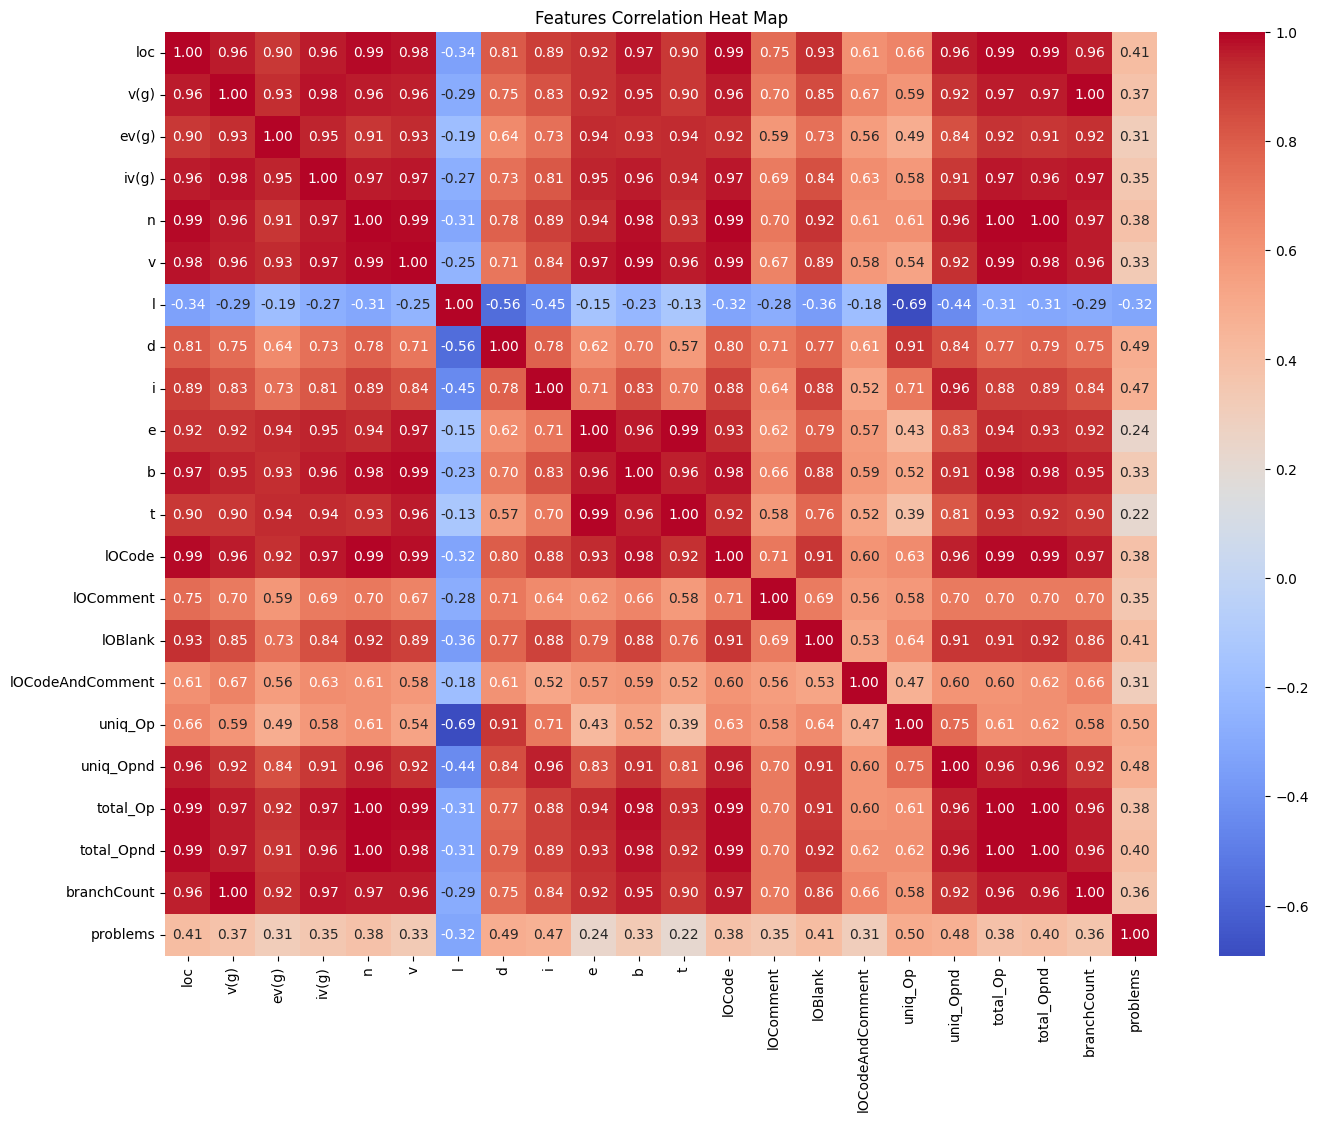

In [ ]:
# Plotting the features correlation heat map
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
correlation_matrix = scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Correlation Heat Map')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

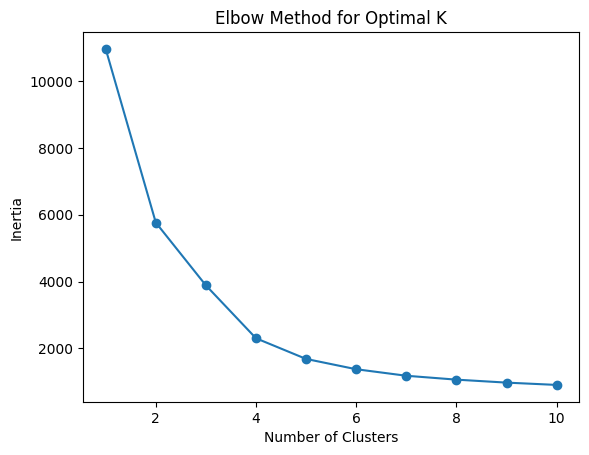

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        loc      v(g)     ev(g)     iv(g)         n         v         l  \
0 -0.459678 -0.318567 -0.157259 -0.279626 -0.400550 -0.305207  3.724554   
1 -0.460962 -0.355043 -0.217331 -0.329333 -0.401838 -0.305372  2.635010   
2  4.855635  4.933911  7.141555  5.884053  4.567977  4.326553 -0.960482   
3  2.479861  2.563001  1.134301  1.534683  2.061611  1.749904 -0.887845   
4  1.773550  1.924679  1.434664  1.161879  1.739732  1.414578 -0.887845   

          d         i         e  ...  lOComment   lOBlank  lOCodeAndComment  \
0 -0.761444 -0.839282 -0.163850  ...   0.000000 -0.254084          1.656694   
1 -0.788525 -0.848600 -0.163853  ...  -0.179317 -0.362710          0.692598   
2  8.466745  1.643734  7.531685  ...   5.917475  0.506296          9.369464   
3  2.715714  2.031997  1.149682  ...   2.331126  3.221939          4.548983   
4  1.782333  2.411562  0.650038  ...   0.896587  1.592553          3.584886   

    uniq_Op  uniq_Opnd  total_Op  total_Opnd  branchCount  problems  clust

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the 'defects' column for clustering
clustering_data = scaled_df.drop(columns=['problems'])

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# From the elbow curve, choose the optimal number of clusters
optimal_k = 2  # Example: Based on the plot, choose the optimal number of clusters

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Add cluster labels to the DataFrame
scaled_df['cluster'] = clusters

# Print the first few rows of the DataFrame with cluster labels
print(scaled_df.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = scaled_df.drop(columns=['problems', 'cluster'])  # Features
y = scaled_df['problems']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize classifiers
svm_classifier = SVC(kernel='linear', random_state=42)
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Initialize stacking classifier
estimators = [('svm', svm_classifier), ('nb', nb_classifier), ('rf', rf_classifier)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=nb_classifier)

# Train the classifiers
svm_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
stacking_classifier.fit(X_train, y_train)

# Predictions
svm_pred = svm_classifier.predict(X_test)
nb_pred = nb_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
stacking_pred = stacking_classifier.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Print accuracies
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Stacking Classifier Accuracy:", stacking_accuracy)


SVM Accuracy: 0.8323699421965318
Naive Bayes Accuracy: 0.8265895953757225
Random Forest Accuracy: 0.7976878612716763
Stacking Classifier Accuracy: 0.8208092485549133


In [ ]:
from sklearn.metrics import classification_report

# Calculate metrics for SVM
svm_report = classification_report(y_test, svm_pred)
print("SVM Metrics:")
print(svm_report)

# Calculate metrics for Naive Bayes
nb_report = classification_report(y_test, nb_pred)
print("\nNaive Bayes Metrics:")
print(nb_report)

# Calculate metrics for Random Forest
rf_report = classification_report(y_test, rf_pred)
print("\nRandom Forest Metrics:")
print(rf_report)

# Calculate metrics for Stacking Classifier
stacking_report = classification_report(y_test, stacking_pred)
print("\nStacking Classifier Metrics:")
print(stacking_report)


SVM Metrics:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       138
           1       0.67      0.34      0.45        35

    accuracy                           0.83       173
   macro avg       0.76      0.65      0.68       173
weighted avg       0.81      0.83      0.81       173


Naive Bayes Metrics:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       138
           1       0.62      0.37      0.46        35

    accuracy                           0.83       173
   macro avg       0.74      0.66      0.68       173
weighted avg       0.81      0.83      0.81       173


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       138
           1       0.50      0.40      0.44        35

    accuracy                           0.80       173
   macro avg       0.68      0.65      0.66       173
weighted avg   

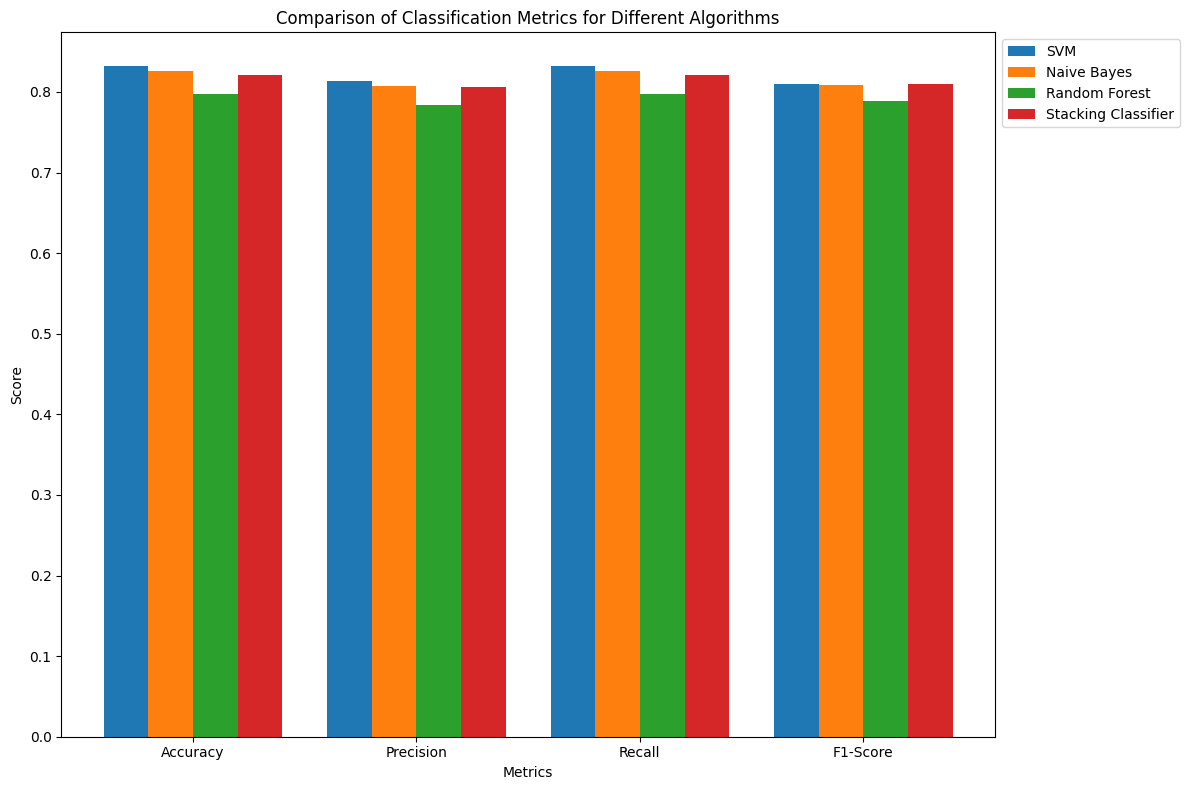

In [ ]:
import matplotlib.pyplot as plt

# Extracting metrics for SVM
svm_metrics = classification_report(y_test, svm_pred, output_dict=True)
svm_accuracy = svm_metrics['accuracy']
svm_precision = svm_metrics['weighted avg']['precision']
svm_recall = svm_metrics['weighted avg']['recall']
svm_f1_score = svm_metrics['weighted avg']['f1-score']

# Extracting metrics for Naive Bayes
nb_metrics = classification_report(y_test, nb_pred, output_dict=True)
nb_accuracy = nb_metrics['accuracy']
nb_precision = nb_metrics['weighted avg']['precision']
nb_recall = nb_metrics['weighted avg']['recall']
nb_f1_score = nb_metrics['weighted avg']['f1-score']

# Extracting metrics for Random Forest
rf_metrics = classification_report(y_test, rf_pred, output_dict=True)
rf_accuracy = rf_metrics['accuracy']
rf_precision = rf_metrics['weighted avg']['precision']
rf_recall = rf_metrics['weighted avg']['recall']
rf_f1_score = rf_metrics['weighted avg']['f1-score']

# Extracting metrics for Stacking Classifier
stacking_metrics = classification_report(y_test, stacking_pred, output_dict=True)
stacking_accuracy = stacking_metrics['accuracy']
stacking_precision = stacking_metrics['weighted avg']['precision']
stacking_recall = stacking_metrics['weighted avg']['recall']
stacking_f1_score = stacking_metrics['weighted avg']['f1-score']

# Plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_values = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
nb_values = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
stacking_values = [stacking_accuracy, stacking_precision, stacking_recall, stacking_f1_score]

x = range(len(labels))

plt.figure(figsize=(12, 8))  # Increase the figure size

plt.bar(x, svm_values, width=0.2, label='SVM', align='center')
plt.bar([i + 0.2 for i in x], nb_values, width=0.2, label='Naive Bayes', align='center')
plt.bar([i + 0.4 for i in x], rf_values, width=0.2, label='Random Forest', align='center')
plt.bar([i + 0.6 for i in x], stacking_values, width=0.2, label='Stacking Classifier', align='center')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Classification Metrics for Different Algorithms')
plt.xticks([i + 0.3 for i in x], labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()



In [ ]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate mean absolute error (MAE)
svm_mae = mean_absolute_error(y_test, svm_pred)
nb_mae = mean_absolute_error(y_test, nb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
stacking_mae = mean_absolute_error(y_test, stacking_pred)

# Calculate root mean squared error (RMSE)
svm_rmse = mean_squared_error(y_test, svm_pred, squared=False)
nb_rmse = mean_squared_error(y_test, nb_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
stacking_rmse = mean_squared_error(y_test, stacking_pred, squared=False)


# Print the calculated metrics
print("SVM MAE:", svm_mae)
print("Naive Bayes MAE:", nb_mae)
print("Random Forest MAE:", rf_mae)
print("Stacking Classifier MAE:", stacking_mae)

print("\nSVM RMSE:", svm_rmse)
print("Naive Bayes RMSE:", nb_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Stacking Classifier RMSE:", stacking_rmse)



SVM MAE: 0.1676300578034682
Naive Bayes MAE: 0.17341040462427745
Random Forest MAE: 0.2023121387283237
Stacking Classifier MAE: 0.1791907514450867

SVM RMSE: 0.40942649865814523
Naive Bayes RMSE: 0.41642574923301445
Random Forest RMSE: 0.44979121681989714
Stacking Classifier RMSE: 0.42330928580068583


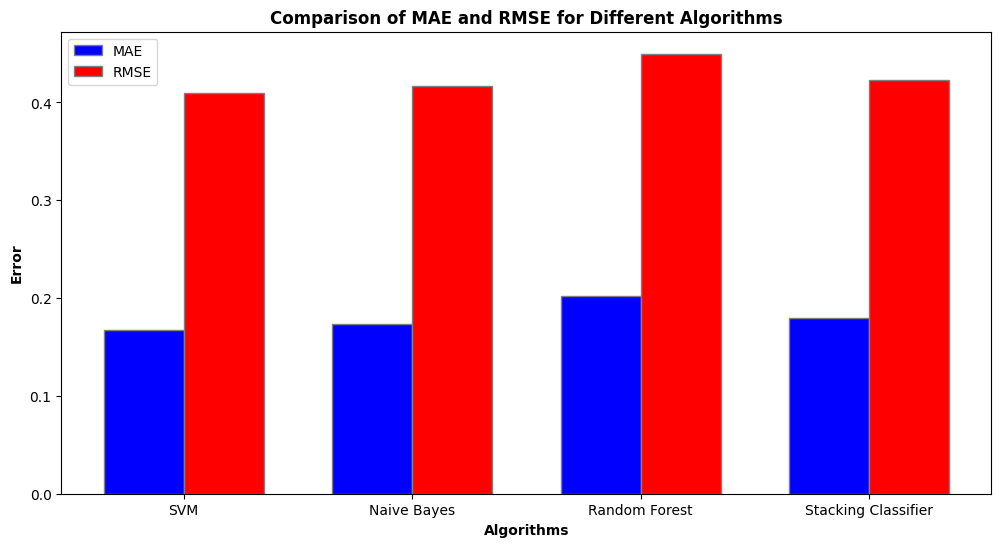

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the algorithms and their corresponding metrics
algorithms = ['SVM', 'Naive Bayes', 'Random Forest', 'Stacking Classifier']
mae_values = [svm_mae, nb_mae, rf_mae, stacking_mae]
rmse_values = [svm_rmse, nb_rmse, rf_rmse, stacking_rmse]

# Set the width of the bars
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(12, 6))

# Create bars
plt.bar(r1, mae_values, color='b', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, rmse_values, color='r', width=bar_width, edgecolor='grey', label='RMSE')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Comparison of MAE and RMSE for Different Algorithms', fontweight='bold')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width/2 for r in range(len(algorithms))], algorithms)

# Create legend
plt.legend()

# Show plot
plt.show()



In [ ]:
pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# X = data.data
# y= data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 16.24it/s]

[LightGBM] [Info] Number of positive: 72, number of negative: 277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 349, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.206304 -> initscore=-1.347351
[LightGBM] [Info] Start training from score -1.347351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
